<a href="https://www.kaggle.com/code/helayahyaoui/logistic-regression-from-scratch-disease-pred?scriptVersionId=100438900" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('../input/heart-disease-prediction-using-logistic-regression/framingham.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Import libraries

In [2]:
import pandas as pd 
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from  sklearn.metrics import accuracy_score 
import seaborn as sns 
import matplotlib.pyplot as plt 

# Dataset

In [3]:
dataset = pd.read_csv('../input/heart-disease-prediction-using-logistic-regression/framingham.csv')

# Preprocessing 

In [4]:
dataset.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [5]:
dataset.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


**iloc** to read a specific location (r, c) --> r: row and c column

iloc [0:5]  : from row nb 0 to row 5

In [6]:
dataset.iloc[:,0].sum()

1819

In [7]:
dataset.shape 

(4238, 16)

In [8]:
dataset.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


<AxesSubplot:>

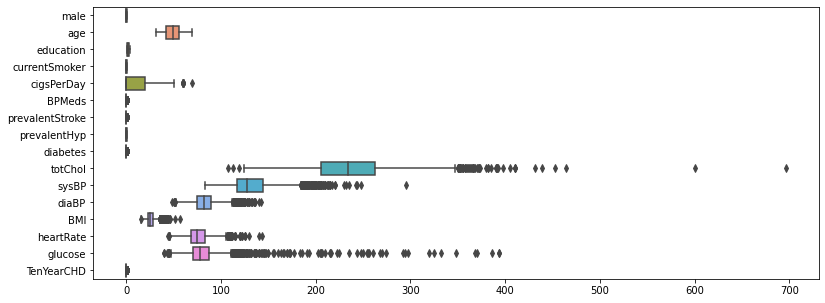

In [9]:
plt.figure(figsize=(13,5))
sns.boxplot(data=dataset,orient='h')

# Extract the number of null values

In [10]:
dataset.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

here variace methods can be used like 
ffill 
bfill
interplolate 


In [11]:
dataset["education"].fillna(dataset["education"].mean(),inplace=True)
dataset["cigsPerDay"].fillna(dataset["education"].mean(),inplace=True)
dataset["BPMeds"].fillna(dataset["BPMeds"].mean(), inplace=True)
dataset["totChol"].fillna(dataset["totChol"].mean(), inplace=True)
dataset["BMI"].fillna(dataset["BMI"].mean(), inplace=True)
dataset["heartRate"].fillna(dataset["heartRate"].mean(), inplace=True)
dataset["glucose"].fillna(dataset["glucose"].mean(), inplace=True)

In [12]:
dataset.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [13]:
features= dataset.drop(columns='TenYearCHD', axis=1)
target=dataset['TenYearCHD']

# Data normalization

**StandardScaler** removes the mean and scales each feature/variable to unit variance.

The standard score of a sample x is calculated as:

z = (x - u) / s

In [14]:
scaler = StandardScaler()
scaler.fit(features)
features= scaler.transform(features)

# Class imbalance problem

In [15]:
dataset['TenYearCHD'].value_counts()

0    3594
1     644
Name: TenYearCHD, dtype: int64

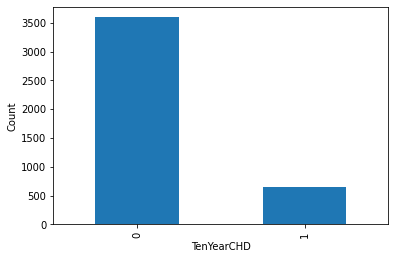

In [16]:
#Plotting values for y_train 
chd_plot=dataset['TenYearCHD'].value_counts().plot(kind='bar')
plt.xlabel('TenYearCHD')
plt.ylabel('Count')
plt.show()

**SMOTE** works by selecting pair of minority class observations and then creating a synthetic point that lies on the line connecting these two

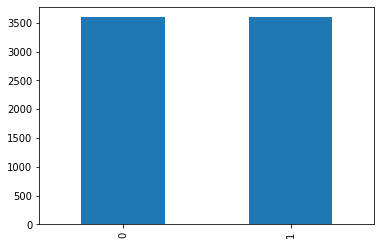

In [17]:
#Using SMOTE to balance the training data
from imblearn.over_sampling import SMOTE
smote = SMOTE()
features, targets = smote.fit_resample(features, target)
ros_chd_plot=targets.value_counts().plot(kind='bar')
plt.show()

In [18]:
targets.shape

(7188,)

In [19]:
features.shape

(7188, 15)

# Split Dataset

In [20]:
xtrain, xt, ytrain, yt = train_test_split(features, targets, test_size=0.2, random_state=1234)

In [21]:
print('xt shape   :' , xt.shape)
print('yt shape   :' , yt.shape)
print('xtrain shape   :' , xtrain.shape)
print('ytrain shape   :' , ytrain.shape)



xt shape   : (1438, 15)
yt shape   : (1438,)
xtrain shape   : (5750, 15)
ytrain shape   : (5750,)


# Logistic regression 

**Sigmoid function**

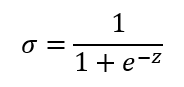

**Prediction function**

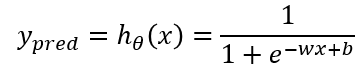

**Cost function**

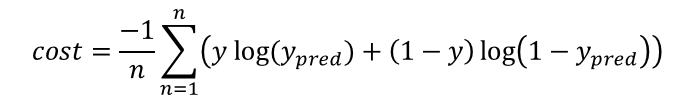

**Learning rate**

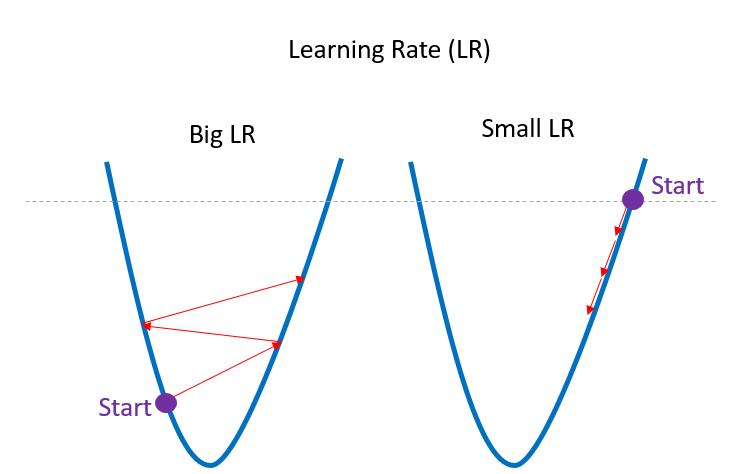

**Gradient descent algorithm**

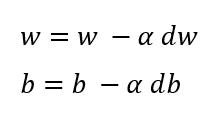

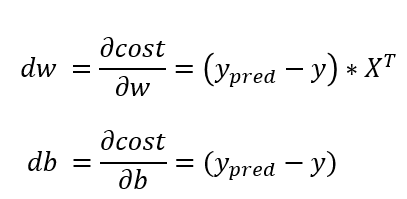

In [22]:
class logiticREG ():
    def __init__ (self, lr=0.01, itr=1000):
        self.lr=lr
        self.itr =itr
        self.w=None
        self.b=None

        
    def train(self, X, Y):
        m, n =X.shape
        self.w=np.zeros(n)
        self.b=0
        #training loop
        for i in range (self.itr+1):
            #calculate hypotheses
            ypred = self.sigmoid(np.dot(X, self.w) + self.b)
            #cost 
            cost= (-1/m)*np.sum(Y*np.log(ypred)+ (1-Y)*np.log(1-ypred))
            #gradient descent 
            dw=(1/m)*np.dot(X.T, (ypred-Y))
            db=(1/m)*np.sum(ypred-Y)
        
            self.w=self.w-self.lr*dw
            self.b=self.b-self.lr*db
            if (i%100==0):
                print('iteration:  ', i, 'cost :   ', cost)
    

    def predict(self, X):
        yp= self.sigmoid(np.dot(X, self.w)+self.b)
        #yp = np.where( yp > 0.5, 1, 0)
        yp=[1 if i > 0.5 else 0 for i in yp]
        #ypred=ypred>0.5
        return yp
    
    def sigmoid(self, z):
        return 1/(1+np.exp(-z))


    

In [23]:
#from sklearn.datasets import make_blobs
#x, y =make_blobs(n_samples=1000, centers=2)
lor=logiticREG()
lor.train(xtrain,ytrain)
ypred=lor.predict(xt)
print('accuracy : ', np.sum(yt==ypred)/yt.shape[0])


iteration:   0 cost :    0.6931471805599454
iteration:   100 cost :    0.6450266690129297
iteration:   200 cost :    0.6306712927165559
iteration:   300 cost :    0.6239420934745971
iteration:   400 cost :    0.6199534523112885
iteration:   500 cost :    0.6173173146139943
iteration:   600 cost :    0.6154815549166417
iteration:   700 cost :    0.6141663738381814
iteration:   800 cost :    0.6132071591610383
iteration:   900 cost :    0.6124985044464181
iteration:   1000 cost :    0.6119695479167584
accuracy :  0.6884561891515995
